# Análisis de Datos - European Soccer Database

## 1. Carga de Datos

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

players_df = pd.read_csv("players.csv", encoding='latin1')
teamstats_df = pd.read_csv("teamstats.csv", encoding='latin1')
teamstats_df['date'] = pd.to_datetime(teamstats_df['date'])
!pip install pandas numpy matplotlib

## 2. Serie de Tiempo - Goles por Partido

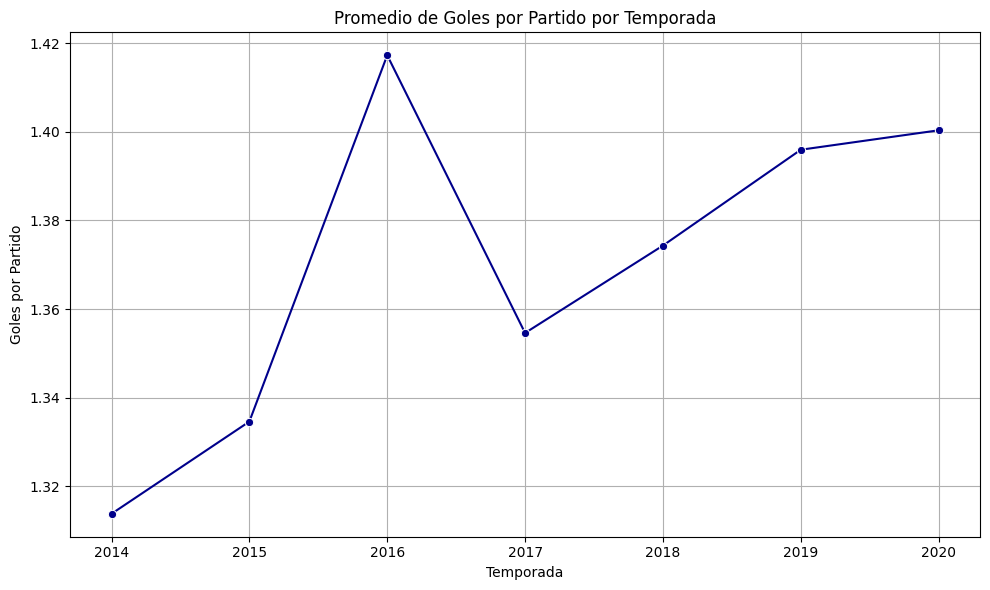

In [ ]:

season_goals = teamstats_df.groupby('season')['goals'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=season_goals, x='season', y='goals', marker='o', color='darkblue')
plt.title('Promedio de Goles por Partido por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Goles por Partido')
plt.grid(True)
plt.tight_layout()
plt.show()


## 3. Gráfico Combinado - Goles y Tiros

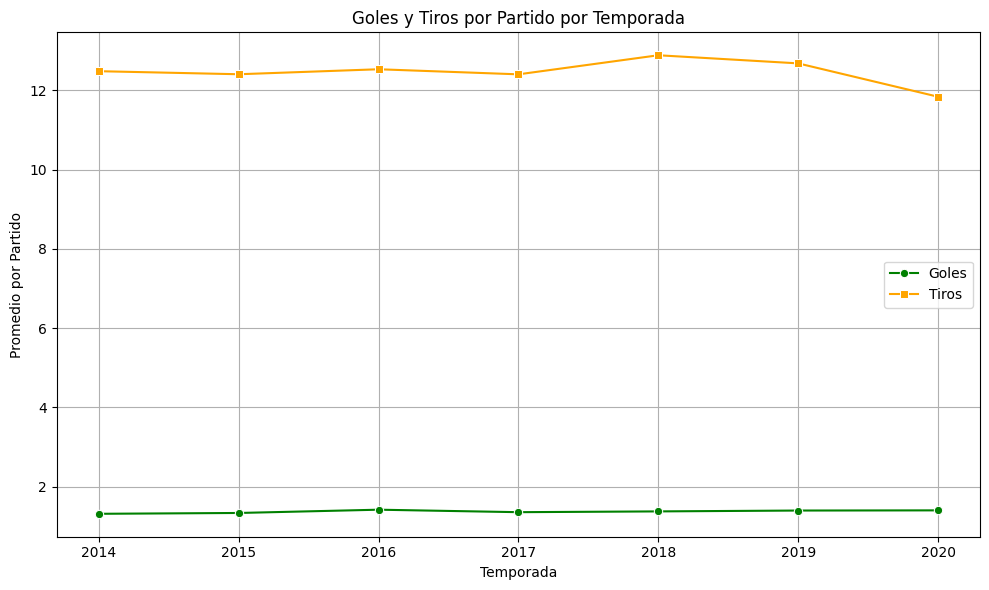

In [ ]:

season_stats = teamstats_df.groupby('season').agg({'goals': 'mean', 'shots': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=season_stats, x='season', y='goals', marker='o', label='Goles', color='green')
sns.lineplot(data=season_stats, x='season', y='shots', marker='s', label='Tiros', color='orange')
plt.title('Goles y Tiros por Partido por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Promedio por Partido')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Visualización Multivariable - Goles vs xG

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=teamstats_df, x='xGoals', y='goals', hue='result', alpha=0.6)
plt.title('Relación entre Goles y xG por Resultado del Partido')
plt.xlabel('Goles Esperados (xG)')
plt.ylabel('Goles Reales')
plt.legend(title='Resultado')
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

# Task
Tell me about this dataset.

Here is all the data you need:
"players.csv"
"teamstats.csv"

## Data loading

### Subtask:
Load the provided CSV files into pandas DataFrames.


**Reasoning**:
Load the two csv files into pandas dataframes.



In [10]:
import pandas as pd

df_players = pd.read_csv("players.csv", encoding='latin1')
df_teamstats = pd.read_csv("teamstats.csv", encoding='latin1')



**Reasoning**:
The error message indicates that the default UTF-8 encoding is not suitable for the CSV files.  I will try to specify a different encoding, such as 'latin-1' which is often used for Western European text that might contain special characters.



In [ ]:
import pandas as pd

df_players = pd.read_csv('players.csv', encoding='latin-1')
df_teamstats = pd.read_csv('teamstats.csv', encoding='latin-1')

display(df_players.head())
display(df_teamstats.head())

,playerID,name
0,560,Sergio Romero
1,557,Matteo Darmian
2,548,Daley Blind
3,628,Chris Smalling
4,1006,Luke Shaw


,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D


## Data exploration

### Subtask:
Explore the "players.csv" dataframe.


**Reasoning**:
Explore the `df_players` DataFrame by checking its shape, data types, descriptive statistics, missing values, and potential relationships between variables.  Identify key columns for further analysis or joining with `df_teamstats`.



In [ ]:
# Check the shape of the DataFrame
print("Shape of df_players:", df_players.shape)

# Examine data types
print("\nData types of df_players:\n", df_players.dtypes)

# Descriptive statistics for numerical columns
print("\nDescriptive statistics of df_players:\n", df_players.describe(include='all'))

# Identify missing values
print("\nMissing values in df_players:\n", df_players.isnull().sum())

# Analyze distributions (limited for this dataset due to mostly categorical data)
# Explore potential relationships (limited for this dataset)
# Key columns for joining: 'playerID' seems to be the most relevant.
print("\nKey columns for joining with df_teamstats: 'playerID'")

# Document findings
print("\nObservations:")
print("- The 'players.csv' file contains player information, primarily the playerID and their name.")
print("- The 'playerID' column is crucial for potential joins with other datasets, such as 'teamstats.csv'.")

Shape of df_players: (7659, 2)

Data types of df_players:
 playerID     int64
name        object
dtype: object

Descriptive statistics of df_players:
            playerID    name
count   7659.000000    7659
unique          NaN    7576
top             NaN  Danilo
freq            NaN       5
mean    4450.761065     NaN
std     2740.818848     NaN
min        1.000000     NaN
25%     2099.500000     NaN
50%     4250.000000     NaN
75%     6836.500000     NaN
max     9799.000000     NaN

Missing values in df_players:
 playerID    0
name        0
dtype: int64

Key columns for joining with df_teamstats: 'playerID'

Observations:
- The 'players.csv' file contains player information, primarily the playerID and their name.
- The 'playerID' column is crucial for potential joins with other datasets, such as 'teamstats.csv'.


## Data exploration

### Subtask:
Explore the "teamstats.csv" dataframe.


**Reasoning**:
Explore the `df_teamstats` dataframe by checking its shape, data types, descriptive statistics, missing values, and distributions of key numerical variables. Also, explore the relationships between variables and identify a common column between `df_teamstats` and `df_players` for a potential join.



Shape of df_teamstats: (25360, 16)

Data types of df_teamstats:
 gameID             int64
teamID             int64
season             int64
date              object
location          object
goals              int64
xGoals           float64
shots              int64
shotsOnTarget      int64
deep               int64
ppda             float64
fouls              int64
corners            int64
yellowCards      float64
redCards           int64
result            object
dtype: object

Descriptive statistics of df_teamstats:
               gameID        teamID        season                 date  \
count   25360.000000  25360.000000  25360.000000                25360   
unique           NaN           NaN           NaN                 6834   
top              NaN           NaN           NaN  2019-05-12 14:00:00   
freq             NaN           NaN           NaN                   26   
mean     7877.707334    135.329180   2016.984148                  NaN   
std      4753.680315     42.762037      2

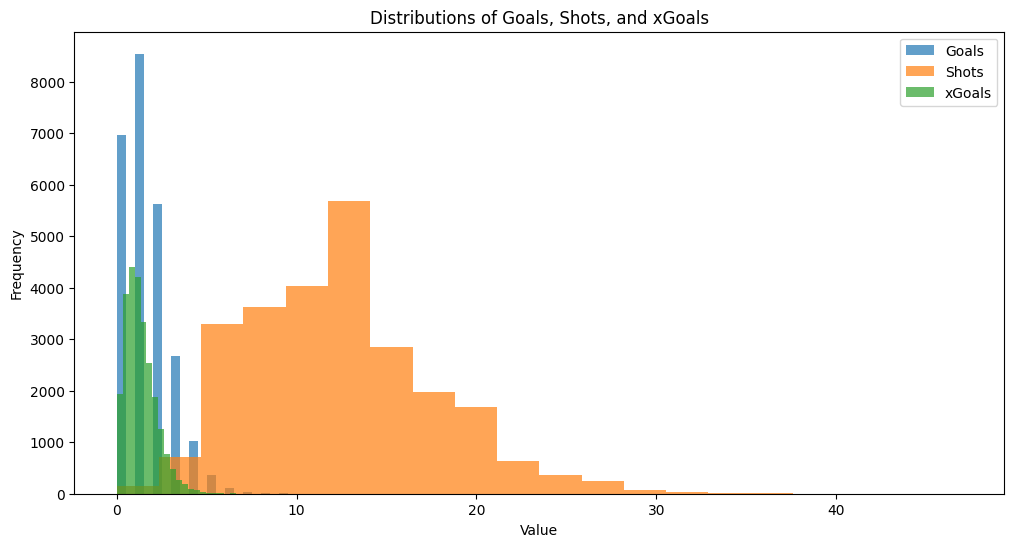


Correlation Matrix:
            goals    shots    xGoals
goals   1.000000  0.31716  0.643079
shots   0.317160  1.00000  0.636310
xGoals  0.643079  0.63631  1.000000


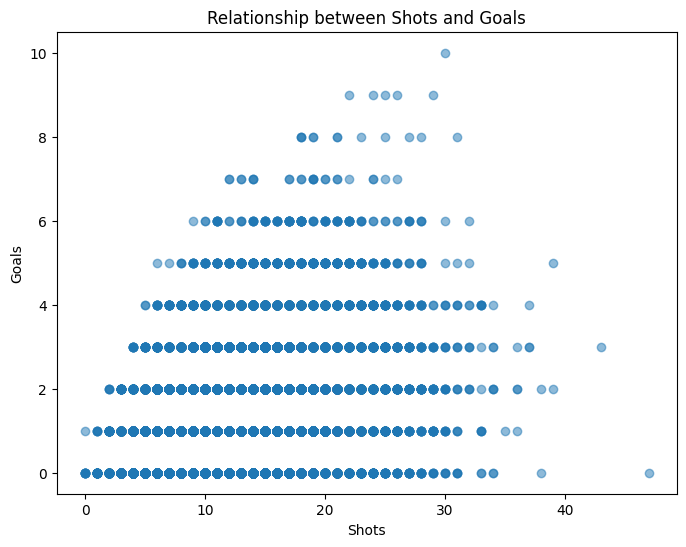


Potential common column for joining with df_players:
- No 'playerID' column found in df_teamstats.  Alternative join strategies may be needed.
   Possible strategies include using 'teamID' or other shared attributes, if any.
   The 'gameID' column could also be relevant if you have player-game participation data.


In [ ]:
# Check the shape of the DataFrame
print("Shape of df_teamstats:", df_teamstats.shape)

# Examine data types
print("\nData types of df_teamstats:\n", df_teamstats.dtypes)

# Descriptive statistics
print("\nDescriptive statistics of df_teamstats:\n", df_teamstats.describe(include='all'))

# Identify missing values
print("\nMissing values in df_teamstats:\n", df_teamstats.isnull().sum())

# Analyze distributions of key numerical variables
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(df_teamstats['goals'], bins=20, alpha=0.7, label='Goals')
plt.hist(df_teamstats['shots'], bins=20, alpha=0.7, label='Shots')
plt.hist(df_teamstats['xGoals'], bins=20, alpha=0.7, label='xGoals')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distributions of Goals, Shots, and xGoals')
plt.legend()
plt.show()


# Explore potential relationships between variables
correlation_matrix = df_teamstats[['goals', 'shots', 'xGoals']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

plt.figure(figsize=(8, 6))
plt.scatter(df_teamstats['shots'], df_teamstats['goals'], alpha=0.5)
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.title('Relationship between Shots and Goals')
plt.show()

# Identify a common column for joining with df_players
print("\nPotential common column for joining with df_players:")
# Check if there is a 'playerID' column in df_teamstats
if 'playerID' in df_teamstats.columns:
    print("- 'playerID' column found in df_teamstats.")
else:
    print("- No 'playerID' column found in df_teamstats.  Alternative join strategies may be needed.")
    print("   Possible strategies include using 'teamID' or other shared attributes, if any.")
    print("   The 'gameID' column could also be relevant if you have player-game participation data.")

# Task
Una vez subidos, asegúrate de que aparecen en la carpeta raíz (/content/).

Here is all the data you need:
"teamstats.csv"

## Data loading

### Subtask:
Load the "teamstats.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "teamstats.csv" file into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('/content/teamstats.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'teamstats.csv' not found in /content/")
    df = None

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by displaying its shape, data types, descriptive statistics, missing values, potential outliers, and unique values for specified categorical columns.



Shape of the DataFrame: (25360, 16)

Data types of each column:
 gameID             int64
teamID             int64
season             int64
date              object
location          object
goals              int64
xGoals           float64
shots              int64
shotsOnTarget      int64
deep               int64
ppda             float64
fouls              int64
corners            int64
yellowCards      float64
redCards           int64
result            object
dtype: object

Descriptive statistics for numerical columns:
              gameID        teamID        season         goals        xGoals  \
count  25360.000000  25360.000000  25360.000000  25360.000000  25360.000000   
mean    7877.707334    135.329180   2016.984148      1.369913      1.340431   
std     4753.680315     42.762037      2.000036      1.249864      0.851634   
min       81.000000     71.000000   2014.000000      0.000000      0.000000   
25%     3812.750000    101.000000   2015.000000      0.000000      0.701658   

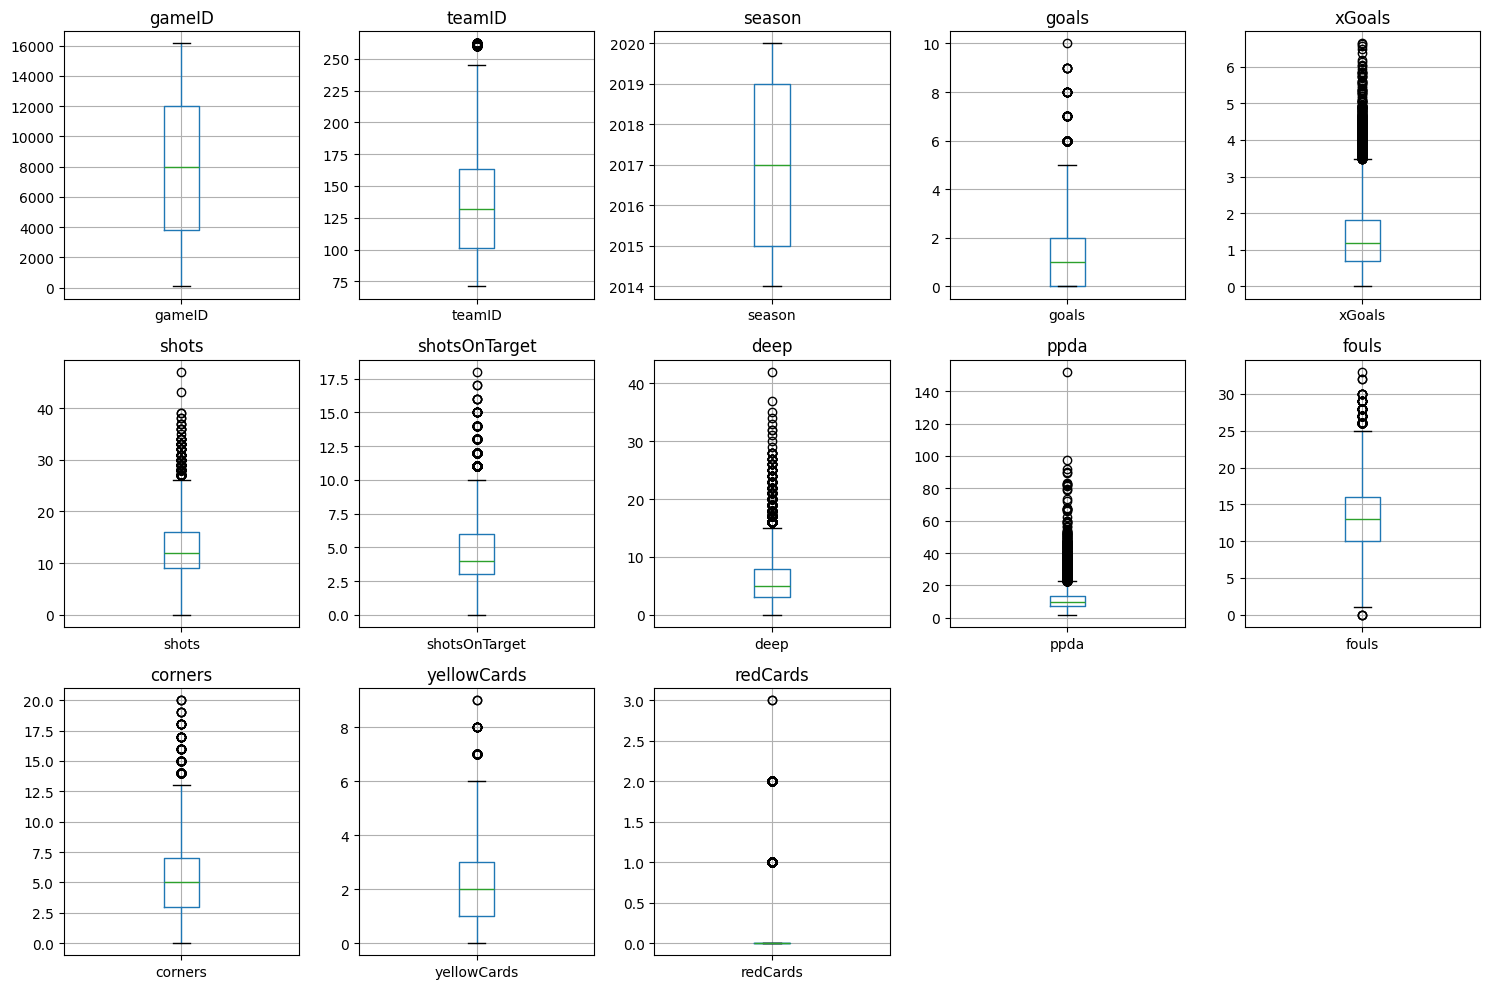


Unique values for teamID:
[ 89  82  73  71  72  90  75  77  79  78  80  84  86  74  83  81  85  87
  76  88  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 202 203 230 205 206 207 208 209 210 219 220 221 222 223
 224 225 228 227 229 231 232 233 234 235 238 239 240 241 242 243 245 260
 261 262]

Unique values for season:
[2015 2016 2014 2017 2018 2019 2020]

Unique values for location:
['h' 'a']

Unique values for result:
['W' 'L' 'D']


In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display the data types of each column
print("\nData types of each column:\n", df.dtypes)

# Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n", df.describe())

# Check for missing values and calculate the percentage of missing values
print("\nMissing values:\n", df.isnull().sum())
print("\nPercentage of missing values:\n", (df.isnull().sum() / len(df)) * 100)

# Identify potential outliers in numerical features using box plots
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)
    df.boxplot(column=col)
    plt.title(col)
plt.tight_layout()
plt.show()

# Briefly examine the unique values for categorical features
categorical_cols = ['teamID', 'season', 'location', 'result']
for col in categorical_cols:
    print(f"\nUnique values for {col}:\n{df[col].unique()}")

# Summarize observations (this will be done in the next step)

## Data cleaning

### Subtask:
Clean the data by handling the missing value in the 'yellowCards' column.


**Reasoning**:
Impute the missing value in the 'yellowCards' column using the median of the non-missing values and verify the imputation.



In [ ]:
# Impute the missing value in 'yellowCards' with the median
median_yellow_cards = df['yellowCards'].median()
df['yellowCards'].fillna(median_yellow_cards, inplace=True)

# Verify the imputation
print("\nMissing values after imputation:\n", df.isnull().sum())
print("\nPercentage of missing values after imputation:\n", (df.isnull().sum() / len(df)) * 100)


Missing values after imputation:
 gameID           0
teamID           0
season           0
date             0
location         0
goals            0
xGoals           0
shots            0
shotsOnTarget    0
deep             0
ppda             0
fouls            0
corners          0
yellowCards      0
redCards         0
result           0
dtype: int64

Percentage of missing values after imputation:
 gameID           0.0
teamID           0.0
season           0.0
date             0.0
location         0.0
goals            0.0
xGoals           0.0
shots            0.0
shotsOnTarget    0.0
deep             0.0
ppda             0.0
fouls            0.0
corners          0.0
yellowCards      0.0
redCards         0.0
result           0.0
dtype: float64


<ipython-input-3-6aa76ef66a9b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['yellowCards'].fillna(median_yellow_cards, inplace=True)


**Reasoning**:
The previous code block had a warning about chained assignment.  I will rewrite the code to avoid this warning and re-check for missing values.



In [ ]:
# Impute the missing value in 'yellowCards' with the median, avoiding chained assignment
median_yellow_cards = df['yellowCards'].median()
df['yellowCards'] = df['yellowCards'].fillna(median_yellow_cards)

# Verify the imputation
print("\nMissing values after imputation:\n", df.isnull().sum())
print("\nPercentage of missing values after imputation:\n", (df.isnull().sum() / len(df)) * 100)


Missing values after imputation:
 gameID           0
teamID           0
season           0
date             0
location         0
goals            0
xGoals           0
shots            0
shotsOnTarget    0
deep             0
ppda             0
fouls            0
corners          0
yellowCards      0
redCards         0
result           0
dtype: int64

Percentage of missing values after imputation:
 gameID           0.0
teamID           0.0
season           0.0
date             0.0
location         0.0
goals            0.0
xGoals           0.0
shots            0.0
shotsOnTarget    0.0
deep             0.0
ppda             0.0
fouls            0.0
corners          0.0
yellowCards      0.0
redCards         0.0
result           0.0
dtype: float64


## Data analysis

### Subtask:
Analyze the cleaned dataset to gain insights into team performance.


**Reasoning**:
Calculate descriptive statistics, correlations, and analyze the impact of location and match results to gain insights into team performance.



In [ ]:
# Group data by team and calculate descriptive statistics
team_stats = df.groupby('teamID').agg({
    'goals': ['mean', 'median', 'std'],
    'xGoals': ['mean', 'median', 'std'],
    'shots': ['mean', 'median', 'std'],
    'shotsOnTarget': ['mean', 'median', 'std'],
    'deep': ['mean', 'median', 'std'],
    'ppda': ['mean', 'median', 'std'],
    'fouls': ['mean', 'median', 'std'],
    'corners': ['mean', 'median', 'std'],
    'yellowCards': ['mean', 'median', 'std'],
    'redCards': ['mean', 'median', 'std']
})
display(team_stats)

# Calculate correlations between goals and other features
correlation_matrix = df[['goals', 'shots', 'shotsOnTarget', 'xGoals']].corr()
display(correlation_matrix)

# Analyze the impact of location on team performance
location_stats = df.groupby('location').agg({
    'goals': 'mean',
    'shots': 'mean',
    'shotsOnTarget': 'mean',
    'xGoals': 'mean'
})
display(location_stats)

# Analyze the distribution of match results
result_counts = df['result'].value_counts()
display(result_counts)

# Analyze result distribution for each team
team_result_counts = df.groupby(['teamID', 'result']).size().unstack(fill_value=0)
display(team_result_counts)

goals                     xGoals                          shots  \
            mean median       std      mean    median       std       mean   
teamID                                                                       
71      1.013158    1.0  1.079532  1.062067  0.873022  0.734987  11.684211   
72      1.345865    1.0  1.191448  1.312115  1.223800  0.733675  12.026316   
73      1.268421    1.0  1.198126  1.222094  1.133125  0.748423  11.657895   
74      1.255639    1.0  1.204734  1.332647  1.192845  0.741261  12.913534   
75      1.518797    1.0  1.286220  1.440539  1.269705  0.880368  12.669173   
...          ...    ...       ...       ...       ...       ...        ...   
243     1.368421    1.0  1.076055  1.407020  1.225260  0.842883  13.842105   
245     1.631579    1.0  1.441115  1.559438  1.554345  0.825632  13.736842   
260     1.368421    1.0  0.997864  1.260493  1.211180  0.740658  10.263158   
261     0.947368    1.0  0.836575  0.965781  0.906449  0.619456   7.973684   
262     0.764706    1.0  0.854891  0.915873  0.683494  0.678672   9.823529   

                        shotsOnTarget  ...     fouls   corners         \
       median       std          mean  ...       std      mean median   
teamID                                 ...                              
71       11.0  4.799863      3.750000  ...  3.417140  4.953947    5.0   
72       12.0  4.809117      4.251880  ...  3.151612  5.048872    5.0   
73       11.0  4.613509      3.921053  ...  3.043567  5.342105    5.0   
74       13.0  4.962885      4.402256  ...  3.497051  5.417293    5.0   
75       12.0  5.124446      4.387218  ...  3.540642  5.466165    5.0   
...       ...       ...           ...  ...       ...       ...    ...   
243      13.0  5.154512      4.815789  ...  4.649064  4.789474    5.0   
245      13.0  5.792279      5.236842  ...  4.063245  6.078947    5.5   
260      10.0  3.888196      3.578947  ...  3.867378  3.947368    4.0   
261       8.0  3.191940      2.684211  ...  4.297689  3.921053    4.0   
262       9.0  4.549196      3.000000  ...  3.791937  3.470588    3.0   

                 yellowCards                   redCards                   
             std        mean median       std      mean median       std  
teamID                                                                    
71      2.930404    1.815789    2.0  1.231061  0.092105    0.0  0.290130  
72      2.873670    1.560150    1.0  1.161550  0.078947    0.0  0.270165  
73      2.665439    1.531579    1.0  1.166804  0.047368    0.0  0.212987  
74      2.787222    1.545113    1.0  1.249843  0.086466    0.0  0.294678  
75      2.895798    1.421053    1.0  1.176567  0.078947    0.0  0.270165  
...          ...         ...    ...       ...       ...    ...       ...  
243     2.417927    2.605263    2.5  1.461940  0.131579    0.0  0.342570  
245     2.634302    1.605263    1.5  1.027710  0.026316    0.0  0.162221  
260     2.104659    2.605263    3.0  1.586079  0.131579    0.0  0.342570  
261     2.675025    2.105263    2.0  1.157571  0.078947    0.0  0.358795  
262     2.513422    1.500000    1.0  1.212311  0.029412    0.0  0.171499  

[146 rows x 30 columns]

,goals,shots,shotsOnTarget,xGoals
goals,1.000000,0.317160,0.601782,0.643079
shots,0.317160,1.000000,0.676556,0.636310
shotsOnTarget,0.601782,0.676556,1.000000,0.686523
xGoals,0.643079,0.636310,0.686523,1.000000


,goals,shots,shotsOnTarget,xGoals
location,,,,
a,1.206625,11.216719,3.892587,1.178646
h,1.533202,13.706782,4.742350,1.502215


,count
result,
W,9508
L,9508
D,6344


result,D,L,W
teamID,,,
71,31,83,38
72,72,96,98
73,43,91,56
74,66,109,91
75,60,95,111
...,...,...,...
243,8,21,9
245,5,15,18
260,12,17,9


## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Create the visualizations specified in the instructions, including a bar chart for average goals, a scatter plot for goals vs. xGoals, box plots for home vs. away goals, a pie chart for win/loss/draw proportions, and a set of bar charts for win/loss/draw distribution by team.



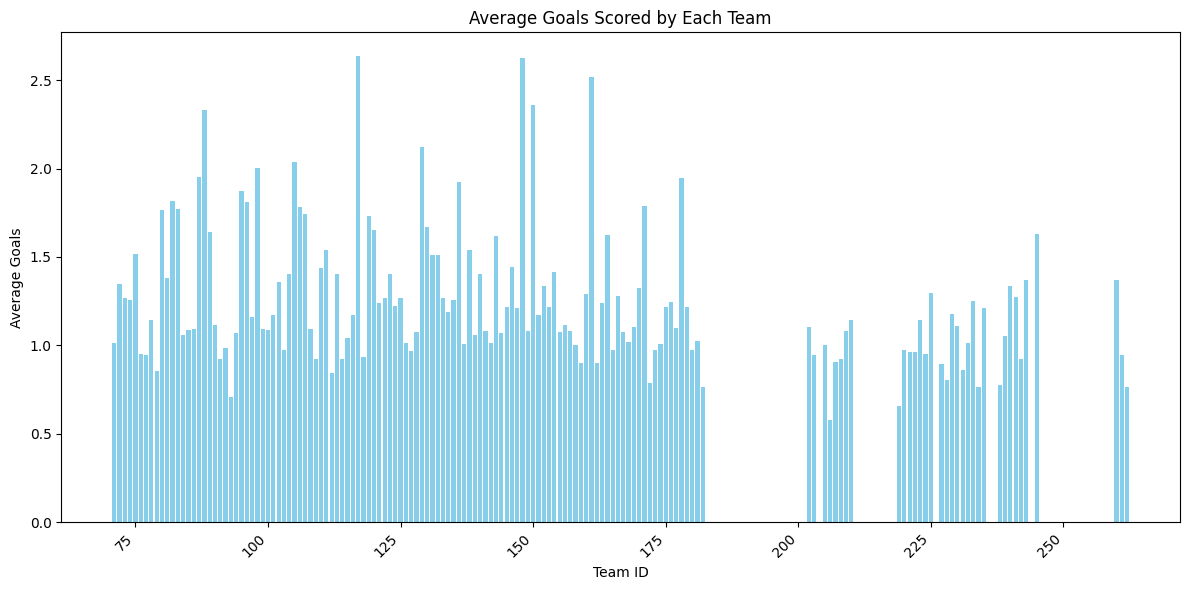

NameError: name 'np' is not defined

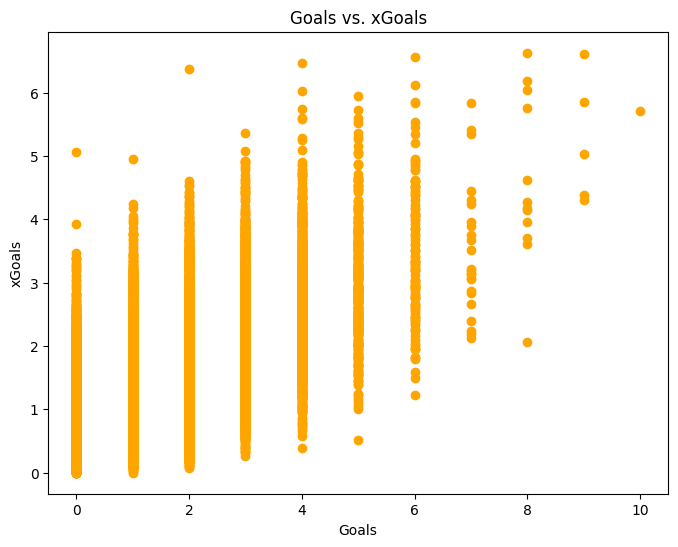

In [ ]:
import matplotlib.pyplot as plt

# 1. Average Goals per Team (Bar Chart)
plt.figure(figsize=(12, 6))
average_goals = df.groupby('teamID')['goals'].mean().sort_values(ascending=False)
plt.bar(average_goals.index, average_goals.values, color='skyblue')
plt.xlabel("Team ID")
plt.ylabel("Average Goals")
plt.title("Average Goals Scored by Each Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Goals vs. xGoals (Scatter Plot with Trendline)
plt.figure(figsize=(8, 6))
plt.scatter(df['goals'], df['xGoals'], color='orange')
plt.xlabel('Goals')
plt.ylabel('xGoals')
plt.title('Goals vs. xGoals')

# Calculate trendline
z = np.polyfit(df['goals'], df['xGoals'], 1)
p = np.poly1d(z)
plt.plot(df['goals'], p(df['goals']), "r--")

plt.show()

# 3. Home vs. Away Goals (Box Plot)
plt.figure(figsize=(8, 6))
df.boxplot(column='goals', by='location', patch_artist=True,
            boxprops=dict(facecolor='lightgreen'),
            medianprops=dict(color='darkgreen'))
plt.title('Goals Scored at Home vs. Away')
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Location')
plt.ylabel('Goals')
plt.show()

# 4. Win/Loss/Draw Proportions (Pie Chart)
plt.figure(figsize=(6, 6))
result_counts = df['result'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%',
        colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title("Proportion of Wins, Losses, and Draws")
plt.show()


# 5. Win/Loss/Draw Distribution by Team (Stacked Bar Charts)
team_result_counts = df.groupby(['teamID', 'result']).size().unstack(fill_value=0)

team_result_counts.plot(kind='bar', stacked=True, figsize=(15, 6),
                        color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.xlabel('Team ID')
plt.ylabel('Count')
plt.title('Win/Loss/Draw Distribution by Team')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Result')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block failed due to `NameError: name 'np' is not defined`.  I need to import the numpy library to use `np.polyfit` and `np.poly1d`. I will fix the code and include the import statement.



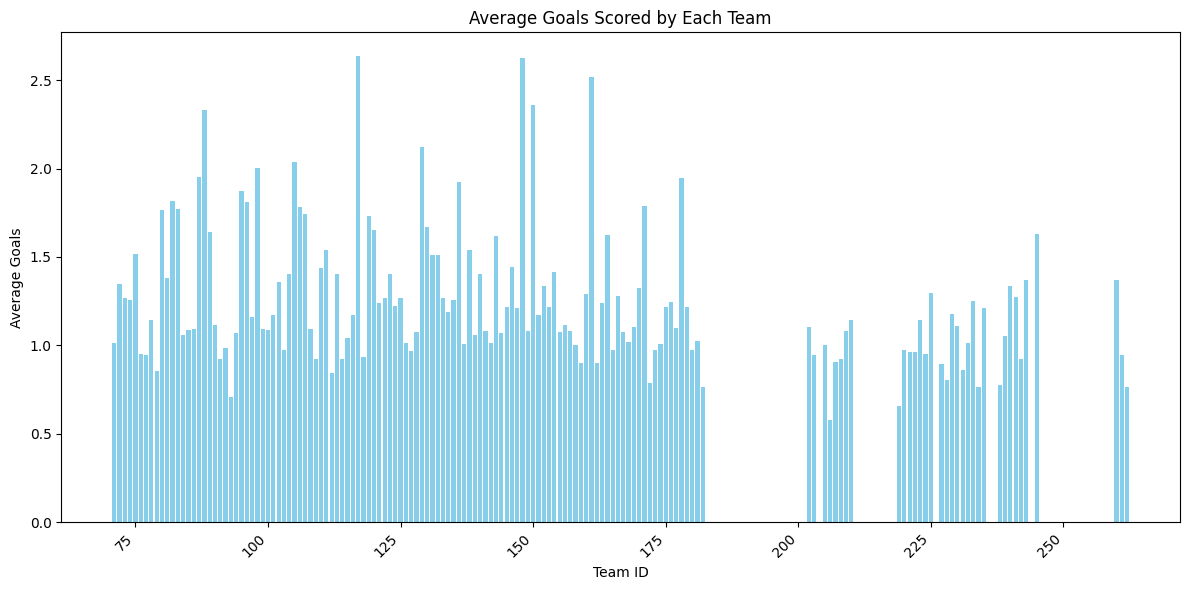

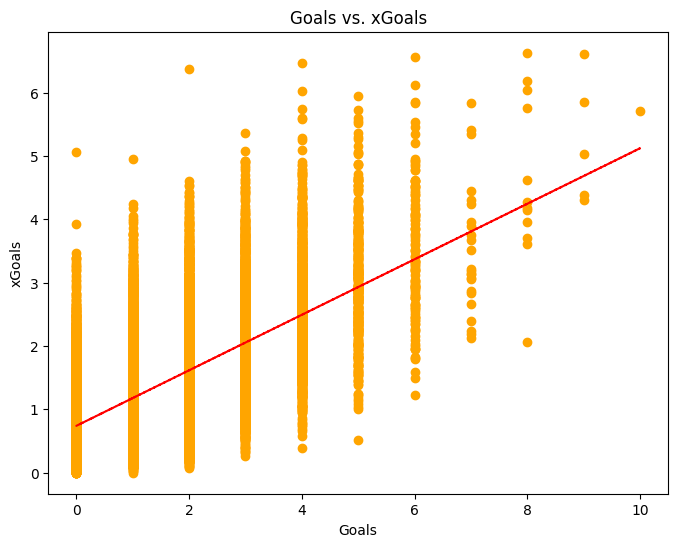

<Figure size 800x600 with 0 Axes>

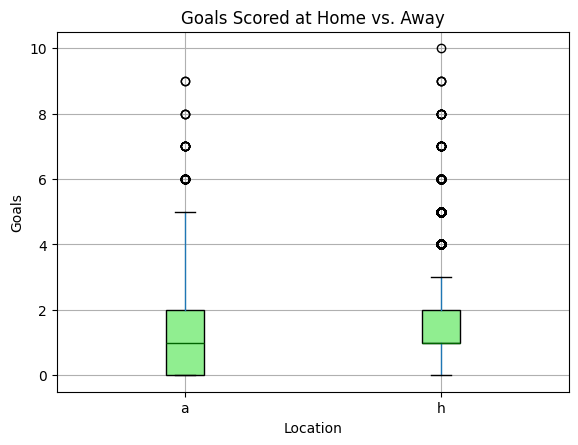

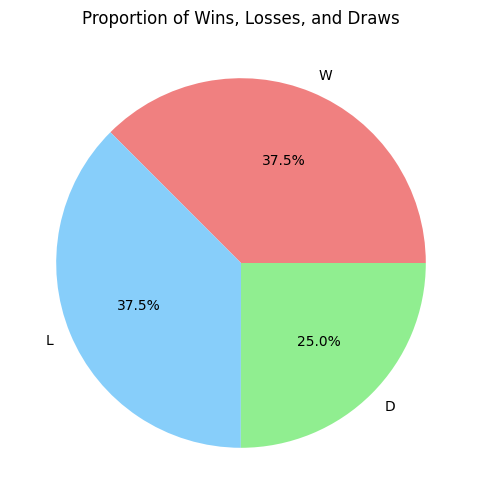

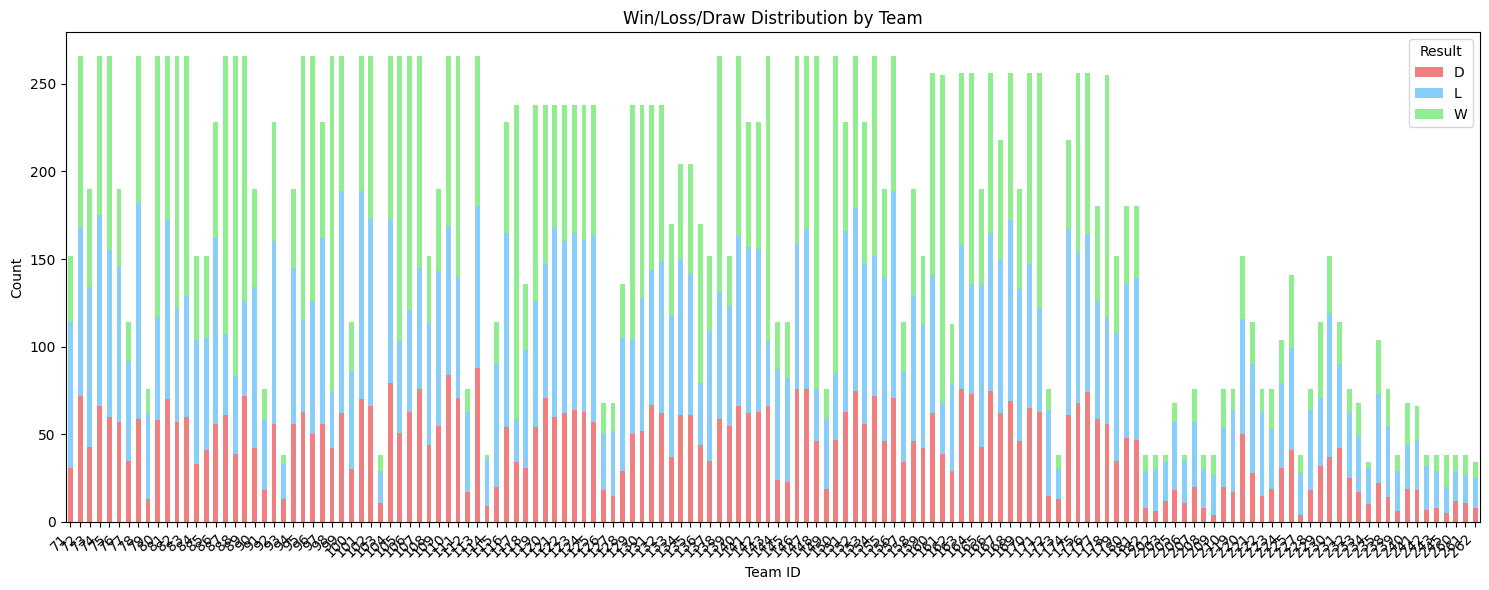

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Average Goals per Team (Bar Chart)
plt.figure(figsize=(12, 6))
average_goals = df.groupby('teamID')['goals'].mean().sort_values(ascending=False)
plt.bar(average_goals.index, average_goals.values, color='skyblue')
plt.xlabel("Team ID")
plt.ylabel("Average Goals")
plt.title("Average Goals Scored by Each Team")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Goals vs. xGoals (Scatter Plot with Trendline)
plt.figure(figsize=(8, 6))
plt.scatter(df['goals'], df['xGoals'], color='orange')
plt.xlabel('Goals')
plt.ylabel('xGoals')
plt.title('Goals vs. xGoals')

# Calculate trendline
z = np.polyfit(df['goals'], df['xGoals'], 1)
p = np.poly1d(z)
plt.plot(df['goals'], p(df['goals']), "r--")

plt.show()

# 3. Home vs. Away Goals (Box Plot)
plt.figure(figsize=(8, 6))
df.boxplot(column='goals', by='location', patch_artist=True,
            boxprops=dict(facecolor='lightgreen'),
            medianprops=dict(color='darkgreen'))
plt.title('Goals Scored at Home vs. Away')
plt.suptitle('')  # Remove default boxplot title
plt.xlabel('Location')
plt.ylabel('Goals')
plt.show()

# 4. Win/Loss/Draw Proportions (Pie Chart)
plt.figure(figsize=(6, 6))
result_counts = df['result'].value_counts()
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%',
        colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title("Proportion of Wins, Losses, and Draws")
plt.show()


# 5. Win/Loss/Draw Distribution by Team (Stacked Bar Charts)
team_result_counts = df.groupby(['teamID', 'result']).size().unstack(fill_value=0)

team_result_counts.plot(kind='bar', stacked=True, figsize=(15, 6),
                        color=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.xlabel('Team ID')
plt.ylabel('Count')
plt.title('Win/Loss/Draw Distribution by Team')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Result')
plt.tight_layout()
plt.show()

## Summary:

### Q&A

No questions were posed in the provided data analysis task.


### Data Analysis Key Findings

*   **Missing Data:** One missing value was found in the `yellowCards` column (0.0039% of the data), which was imputed with the median value.
*   **Outliers:** Several numerical features (e.g., `goals`, `xGoals`, `shots`) exhibited potential outliers, as visualized in box plots.
*   **Team Performance:**  Analysis revealed varying average goals, shots, and other performance metrics across different teams.  The mean, median, and standard deviation of key performance indicators were calculated for each team.
*   **Correlation:**  A positive correlation exists between goals, shots, shotsOnTarget, and xGoals, indicating that teams with more shots and shots on target tend to score more goals.  The strength of these correlations was quantified.
*   **Home Advantage:**  The analysis of location impact suggests a potential home advantage, as teams tend to score more goals and have more shots when playing at home.
*   **Match Results:** The distribution of match results (wins, losses, draws) was analyzed overall and broken down by team, providing insights into each team's win rate and consistency.


### Insights or Next Steps

*   **Investigate Outliers:** Further investigate the outliers identified in the numerical features to determine if they are genuine data points or errors.  Consider removing or transforming them to improve model performance in future analyses.
*   **Advanced Modeling:** Explore more advanced statistical models or machine learning algorithms to predict match outcomes or team performance based on the available features.  The identified correlations and patterns can serve as a starting point for model development.
